<a href="https://colab.research.google.com/github/HyungSeokSeo1122/SQL/blob/master/Titanic_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing basic libararies

In [2]:
!pip install firecrawl

In [6]:
import time
from firecrawl import FirecrawlApp, JsonConfig
from pydantic import BaseModel

# Setup your app
app = FirecrawlApp(api_key='fc-1dff45addbbe45a2b1d0727b59ed1d15')

class ExtractSchema(BaseModel):
    company_mission: str
    supports_sso: bool
    is_open_source: bool
    is_in_yc: bool

json_config = JsonConfig(
    extractionSchema=ExtractSchema.model_json_schema(),
    mode="llm-extraction",
    pageOptions={"onlyMainContent": True}
)

def safe_scrape(url, retries=3, wait_seconds=5):
    """Retry scraping on timeout."""
    for attempt in range(retries):
        try:
            return app.scrape_url(
                url,
                formats=["json"],
                json_options=json_config
            )
        except Exception as e:
            print(f"Attempt {attempt+1} failed: {e}")
            if attempt < retries - 1:
                time.sleep(wait_seconds)
            else:
                raise e

# Use safe scrape
llm_extraction_result = safe_scrape('https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/')
print(llm_extraction_result)


Attempt 1 failed: Request Timeout: Failed to scrape URL as the request timed out. Request timed out - No additional error details provided.
Attempt 2 failed: Request Timeout: Failed to scrape URL as the request timed out. Request timed out - No additional error details provided.
Attempt 3 failed: Request Timeout: Failed to scrape URL as the request timed out. Request timed out - No additional error details provided.


HTTPError: Request Timeout: Failed to scrape URL as the request timed out. Request timed out - No additional error details provided.

In [7]:
from firecrawl import FirecrawlApp, JsonConfig
from pydantic import BaseModel, Field

# Initialize the FirecrawlApp with your API key
app = FirecrawlApp(api_key='fc-1dff45addbbe45a2b1d0727b59ed1d15')

class ExtractSchema(BaseModel):
    company_mission: str
    supports_sso: bool
    is_open_source: bool
    is_in_yc: bool

json_config = JsonConfig(
    extractionSchema=ExtractSchema.model_json_schema(),
    mode="llm-extraction",
    pageOptions={"onlyMainContent": True}
)

llm_extraction_result = app.scrape_url(
    'https://n.news.naver.com/mnews/article/001/0015356490?rc=N&ntype=RANKING',
    formats=["json"],
    json_options=json_config
)
print(llm_extraction_result)

url=None markdown=None html=None rawHtml=None links=None extract=None json=<function BaseModel.json at 0x790aaa2e2d40> screenshot=None metadata={'ogTitle': "SKT 무상교체 첫날 유심대란…오픈런했지만 물량부족에 '헛걸음'(종합)", 'og:type': 'article', 'twitter:title': "SKT 무상교체 첫날 유심대란…오픈런했지만 물량부족에 '헛걸음'(종합)", 'napp-site-analysis': 'gdid=880000D8_000000000000000015356490,service=news,collection=news,section=105', 'news-article-recently-created': 'true', 'twitter:creator': '연합뉴스', 'ogImage': 'https://imgnews.pstatic.net/image/001/2025/04/28/AKR20250428056451017_03_i_P4_20250428125627498.jpg?type=w800', 'favicon': 'https://ssl.pstatic.net/static.news/image/news/m/2023/08/21/favicon.ico', 'twitter:site': '네이버 뉴스', 'og:url': 'https://n.news.naver.com/mnews/article/001/0015356490', 'og:title': "SKT 무상교체 첫날 유심대란…오픈런했지만 물량부족에 '헛걸음'(종합)", 'og:article:author': '연합뉴스 | 네이버', 'twitter:image': 'https://imgnews.pstatic.net/image/001/2025/04/28/AKR20250428056451017_03_i_P4_20250428125627498.jpg?type=w800', 'title': "SKT 무상교체 첫날 유

In [8]:
llm_extraction_result

ScrapeResponse(url=None, markdown=None, html=None, rawHtml=None, links=None, extract=None, json=<function BaseModel.json at 0x790aaa2e2d40>, screenshot=None, metadata={'ogTitle': "SKT 무상교체 첫날 유심대란…오픈런했지만 물량부족에 '헛걸음'(종합)", 'og:type': 'article', 'twitter:title': "SKT 무상교체 첫날 유심대란…오픈런했지만 물량부족에 '헛걸음'(종합)", 'napp-site-analysis': 'gdid=880000D8_000000000000000015356490,service=news,collection=news,section=105', 'news-article-recently-created': 'true', 'twitter:creator': '연합뉴스', 'ogImage': 'https://imgnews.pstatic.net/image/001/2025/04/28/AKR20250428056451017_03_i_P4_20250428125627498.jpg?type=w800', 'favicon': 'https://ssl.pstatic.net/static.news/image/news/m/2023/08/21/favicon.ico', 'twitter:site': '네이버 뉴스', 'og:url': 'https://n.news.naver.com/mnews/article/001/0015356490', 'og:title': "SKT 무상교체 첫날 유심대란…오픈런했지만 물량부족에 '헛걸음'(종합)", 'og:article:author': '연합뉴스 | 네이버', 'twitter:image': 'https://imgnews.pstatic.net/image/001/2025/04/28/AKR20250428056451017_03_i_P4_20250428125627498.jpg?type=w800', 

In [2]:
# Install the package
!pip install -U crawl4ai

# For pre release versions
!pip install crawl4ai --pre

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 24.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.6 MB/s eta 0:00:00
  Created wheel for litellm: filename=litellm-1.67.4.post1-py3-none-any.whl

In [1]:
# Run post-installation setup
!crawl4ai-setup

# Verify your installation
!crawl4ai-doctor

[INIT].... → Running post-installation setup...
[INIT].... → Installing Playwright browsers...
Installing dependencies...
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 k

In [21]:
import asyncio
from crawl4ai import *

async def main():
    async with AsyncWebCrawler() as crawler:
        result = await crawler.arun(
            url="https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/",
        )
        print(result.markdown)
        return result  # Return the result

if __name__ == "__main__":
    # Get the current running event loop using asyncio.get_running_loop()
    # instead of asyncio.get_event_loop()
    # asyncio.get_event_loop() might create a new loop if none is running.
    # Using asyncio.get_running_loop() fetches the currently running loop.
    loop = asyncio.get_running_loop()


    # Execute the coroutine within the existing loop
    # Use loop.create_task to schedule the coroutine and then await it.
    # This way, you are using the existing loop to execute your coroutine.
    result = await loop.create_task(main())

    with open("output.md", "w") as f:
        f.write(result.markdown)
    print("Markdown saved to output.md")
    #print(result.markdown) # Access markdown from the result object

[INIT].... → Crawl4AI 0.6.2
[FETCH]... ↓ https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/                                            | ✓ | ⏱: 14.83s
[SCRAPE].. ◆ https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/                                            | ✓ | ⏱: 0.75s
[COMPLETE] ● https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/                                            | ✓ | ⏱: 15.62s
[본문 바로가기](https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/#container)
일주일 그만보기
닫기 
![](https://images.samsung.com/kdp/common/img-induce-benefit-4.png)
**갤럭시 AI 폰** 구매 고객님께 드리는 **스마트태그2** 를 지금 신청하세요!(대상 모델 : S24 시리즈, S23 FE, Z Fold5 | Z Flip5, S23 시리즈)
신청하기
**갤럭시 캠퍼스 회원** 이시네요! 리뉴얼 이벤트와 오리지널 콘텐츠, 더 풍성해진 커뮤니티까지! **새로워진 갤럭시 캠퍼스** 를 만나보세요 
갤럭시 캠퍼스로 이동하기
[ ](javascript:void\(0\); "삼성 닷컴으로 이동")
갤럭시 S25
메뉴닫기
[로그인/회원가입](javascript:doLogin\(\);)
[삼성계정을 만들어야 하는 이유](https://www.samsung.com/sec/why-samsung-account/)
  * [ 기획전](javascript:void\(0\);)
  * [ 모바일](javascript:void\(0\

In [22]:
with open("output.md", "w") as f:
    f.write(result.markdown)
print("Markdown saved to output.md")

Markdown saved to output.md


In [23]:
!pip install scrapingbee

In [24]:
from scrapingbee import ScrapingBeeClient

client = ScrapingBeeClient(api_key='JHN6GQZMMOI7CM46ULHU4GUJ0W3T6BGNHSH2H18Y7V3ROL6QDS3K8XUWF6XGIRSGOJFXB9EOE6263O3Y')
response = client.get('https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/')

'<!DOCTYPE html><html lang="ko" class="js-focus-visible isNotTouchDevice isNotIosDevice dotcom linux webkit chrome sH load desktop Chrome" data-js-focus-visible=""><head>\n\n<title>삼성 갤럭시 S25 울트라 | Galaxy AI | Samsung 대한민국</title>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<link rel="canonical" href="https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/">\n<meta name="keywords" content="갤럭시 S25 울트라, 삼성 갤럭시 S25 울트라, Galaxy AI, 티타늄, 저장용량, 스토리지, 색상, 카메라, 프로세서, 크기, 배터리, s펜">\n<meta name="description" content="티타늄 색상, S펜, 최고의 카메라, 맞춤형 프로세서, 오래 지속되는 배터리, 향상된 Galaxy AI를 갖춘 스마트폰, 새로운 갤럭시 S25 울트라를 만나보세요.">\n<meta name="date" content="">\n<meta name="sitecode" content="sec">\n\n<meta name="twitter:card" content="Summary">\n<meta name="twitter:site" content="@samsungkorea">\n<meta name="twitter:creator" content="@samsungkorea">\n<meta name="twitter:url" content="https://www.samsung.com/s
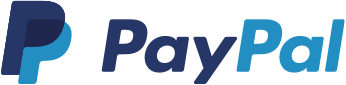
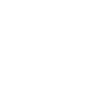

In [29]:
response.text

In [8]:
import asyncio
from crawl4ai import *

async def main():
    async with AsyncWebCrawler() as crawler:
        result = await crawler.arun(
            url="https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/",
        )
        print(result.markdown)

        return result.markdown

if __name__ == "__main__":
    # asyncio.run(main()) # This line caused the issue
    await result = main() # Change to this line to execute in the existing event loop

SyntaxError: cannot assign to await expression here. Maybe you meant '==' instead of '='? (<ipython-input-8-f5aea72499ad>, line 15)

In [2]:
import asyncio
from crawl4ai import *

async def main():
    async with AsyncWebCrawler() as crawler:
        result = await crawler.arun(
            url="https://www.samsung.com/sec/smartphones/galaxy-s25-ultra/",
        )
        print(result.markdown)
        return result.markdown # Return the markdown

if __name__ == "__main__":
    # Get the current running event loop, if one exists; otherwise, create a new one
    try:
        loop = asyncio.get_running_loop()
    except RuntimeError:  # No running loop, create one
        loop = asyncio.new_event_loop()
        asyncio.set_event_loop(loop)

    # Schedule the coroutine within the existing loop
    markdown_content = loop.create_task(main())

    # wait until the crawling is completed
    loop.run_until_complete(markdown_content)
    markdown_content = markdown_content.result()

    # Save the markdown to a file
    with open("output.md", "w") as f:
        f.write(markdown_content)
    print("Markdown saved to output.md")

    # Close the loop after execution
    loop.close()

RuntimeError: This event loop is already running

In [ ]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, make_pipelined
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Loading Titanic Dataset

In [ ]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

## Basic EDA

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'embarked')

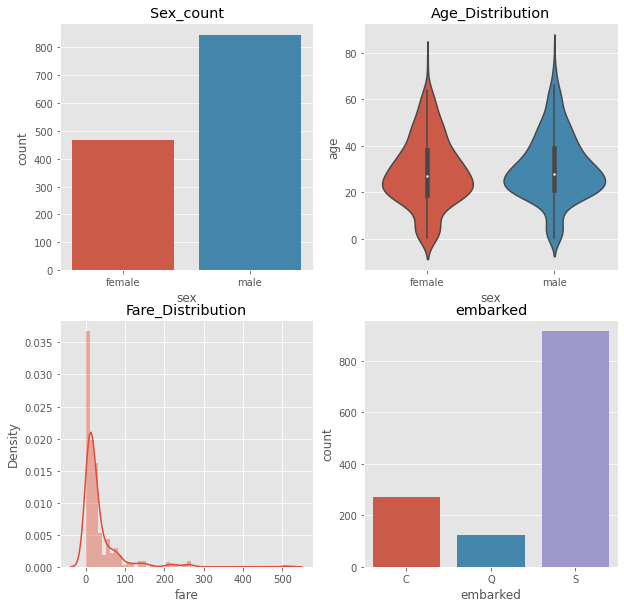

In [ ]:
fig, ax= plt.subplots(2,2,figsize=(10,10))
ax1=sns.countplot(X['sex'],ax=ax[0,0])
ax1.set_title('Sex_count')
ax2=sns.violinplot(data=X,x='sex',y='age',ax=ax[0,1])
ax2.set_title('Age_Distribution')
ax3=sns.distplot(X['fare'],ax=ax[1,0])
ax3.set_title('Fare_Distribution')
ax4=sns.countplot(X['embarked'],ax=ax[1,1])
ax4.set_title('embarked')

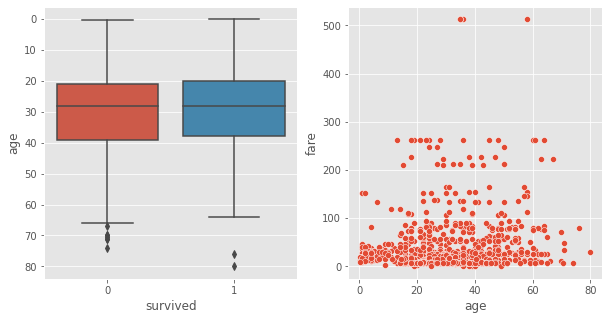

In [ ]:
total_df=X.merge(y,left_index=True,right_index=True)

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax1=sns.boxplot(data=total_df,x='survived',y='age',ax=ax[0])
ax1.invert_yaxis()
ax2=sns.scatterplot(data=total_df,x='age',y='fare',ax=ax[1])

In [ ]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


## Dealing with NA values

In [ ]:
# We can see that there are significant missing values- --> We can either drop the rows with missing data, or replace them , such as 0 or the mean(Does not affect the overall mean)
X.isna().sum(axis=0)

pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
#Fill age with mean
X['age']=X['age'].fillna('mean')
X['fare']=X['fare'].fillna('mean')
X['cabin']=X['cabin'].fillna('N')
X['embarked']=X['embarked'].dropna()
X=X.drop(['boat','body','home.dest','name'],axis=1)

In [ ]:
y=y.loc[X.index]

In [ ]:
X=pd.concat([X,pd.get_dummies(X['sex'])])

## Split Train Test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create classes for classifiers
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# Decision Tree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision Tree Accuracy : {0:4f}'.format(accuracy_score(y_test, dt_pred)))

# Random Forest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('Random Forest Accuracy : {0:4f}'.format(accuracy_score(y_test, rf_pred)))

# Logistic Regression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic Regression Accuracy : {0:4f}'.format(accuracy_score(y_test, lr_pred)))

ValueError: ignored

In [ ]:
X

,age,cabin,embarked,fare,female,male,parch,pclass,sex,sibsp,ticket
0,29.0,B5,S,211.3375,NaN,NaN,0.0,1.0,female,0.0,24160
1,0.9167,C22 C26,S,151.55,NaN,NaN,2.0,1.0,male,1.0,113781
2,2.0,C22 C26,S,151.55,NaN,NaN,2.0,1.0,female,1.0,113781
3,30.0,C22 C26,S,151.55,NaN,NaN,2.0,1.0,male,1.0,113781
4,25.0,C22 C26,S,151.55,NaN,NaN,2.0,1.0,female,1.0,113781
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1305,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1306,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1307,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
